# Advanced fMRI data analysis 
## Functional connectivity


In this assignment, your task is to run simple seed-to-voxel functional connectivity analysis of fMRI data in Python.

You can choose to answer in Polish or English (it will not affect your grade).

**DEADLINE:** 19-06-2020

-------------------

## Task 1



Repeat seed-to-voxel analysis from our last excercise with your favourite brain region as a *seed*!

### Fill some details about the selected seed region:

Name of the selected brain area: dorsal anterior cingulate cortex 

MNI coordinates of selected brain area: 4, 28, 30 

Source (website, journal article, etc.):  Kolling, N., Behrens, T. E. J., Wittmann, M. K., & Rushworth, M. F. S. (2016). Multiple signals in anterior cingulate cortex. Current opinion in neurobiology, 37, 36-43.

In [39]:
# Loading libraries

import numpy as np
from nilearn import datasets
from nilearn import input_data
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting

In [40]:
# Loading fMRI data

dataset = datasets.fetch_development_fmri(n_subjects=1)
func_filename = dataset.func[0]
confounds_filename = dataset.confounds[0]

In [41]:
# Creating a seed

acc_coords = [(4,28,30)]

seed_masker = input_data.NiftiSpheresMasker(
    acc_coords, radius=8,
    detrend=True, standardize=True)

In [42]:
# Extracting timeseries from a seed

seed_timeseries = seed_masker.fit_transform(func_filename,
                                             confounds=confounds_filename)
seed_timeseries = np.squeeze(seed_timeseries)

In [43]:
# Extracting timeseries from brain regions

brain_masker = input_data.NiftiMasker(
    smoothing_fwhm=8,
    detrend=True, standardize=True,
    memory='nilearn_cache', memory_level=1, verbose=0)

brain_timeseries = brain_masker.fit_transform(func_filename,
                                               confounds=confounds_filename)

In [44]:
# Quick look at both of the timeseries

print(seed_timeseries.shape)
print(brain_timeseries.shape)

(168,)
(168, 32504)


In [45]:
# Calculationg seed to voxel correlations

seed_to_voxel_correlations = (np.dot(brain_timeseries.T, seed_timeseries) /
                              seed_timeseries.shape[0])

In [46]:
# Calculating Pearson correlation coefficient

from scipy import stats
corr_map = np.zeros(brain_timeseries.shape[1])

for i in range(brain_timeseries.shape[1]):
    corr_map[i] = stats.pearsonr(seed_timeseries, brain_timeseries[:,i])[0]

NameError: name 'plt' is not defined

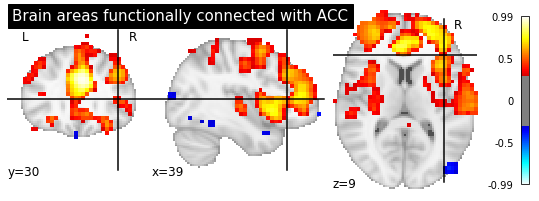

In [47]:
# Plotting correlation using stat map

seed_to_voxel_correlations_img = brain_masker.inverse_transform(corr_map.T)
plotting.plot_stat_map(seed_to_voxel_correlations_img, threshold=0.3,
                       title="Brain areas functionally connected with ACC")
plt.show()

display.add_markers(acc_coord)
plt.show()

What brain areas are functionally connected with your seed region?

**Answer**: orbitofrontal cortex, cingulate gyrus, insula